In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import *
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
from collections import Counter
import seaborn as sns
import string
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
import gensim

In [3]:
import math
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

In [4]:
df_all = pd.read_csv('/Users/natalipeeva/Desktop/Data/questions.csv')

In [5]:
df_trans_links = pd.read_csv('/Users/natalipeeva/Desktop/Data/Questions_links_translations.csv')

In [6]:
df_all.head()

,Year,Month,Question,Answer,Document,URLs
0,2018,12,\n \n1. Heeft het college kennisgenomen van de...,\nNee.,https://amsterdam.raadsinformatie.nl/document/...,NaN
1,2018,12,\n \n2. Kan het college bevestigen of dit lesm...,"\nNee, het college heeft hier geen zicht op. ...",https://amsterdam.raadsinformatie.nl/document/...,NaN
2,2018,12,\n \n ...,\nHet CIDI is duidelijk over de eigen doelste...,https://amsterdam.raadsinformatie.nl/document/...,NaN
3,2018,12,\n \n4. Is het college bekend met de jaarlijks...,\nHet college heeft hier kennis van genomen.,https://amsterdam.raadsinformatie.nl/document/...,NaN
4,2018,12,\n \na. Is het college van oordeel dat het CID...,vraag 4a: \nHet college is voor een pluriform...,https://amsterdam.raadsinformatie.nl/document/...,NaN


In [7]:
df_trans_links.head()

,Unnamed: 0,Year,Month,Question,Answer,Document,URLs,Translated Questions,Translated Answers
0,9,2015,1,\n1. Komt het in Amsterdam al voor dat er gesu...,\nMomenteel vindt er geen gemeentelijk taalaa...,https://amsterdam.raadsinformatie.nl/document/...,http://www.parool.nl/parool/nl/4060/AMSTERDAM-...,1. Does it already happen in Amsterdam that su...,Currently there is no municipal language offer...
1,25,2013,6,\n1. Is het college op de hoogte van het rappo...,"\nJa, het college heeft kennisgenomen van het...",https://amsterdam.raadsinformatie.nl/document/...,http://www.dekinderombudsman.nl/86/volwassen/n...,1. Is the Board aware of the report of the Omb...,"Yes, the Board has taken note of the report. T..."
2,92,2013,9,\n1. Heeft het college kennisgenomen van de be...,\nJa. \n ...,https://amsterdam.raadsinformatie.nl/document/...,http://afvalonline.nl/bericht?id=17424\nhttp:/...,1. Has the Commission taken note of the report...,Yes.\n ...
3,101,2013,7,\n6. Wat gaat het college doen om ervoor te zo...,\nEen klas van 28 leerlingen wordt niet als i...,https://amsterdam.raadsinformatie.nl/document/...,http://www.rekenkamer.nl/Publicaties/Onderzoek...,6. What will the council do to ensure that the...,A class of 28 students is not considered an id...
4,117,2020,4,\n2. Wat doet de gemeente de komende weken om ...,\nNatuurlijke bestrijding \n- Er zijn...,https://amsterdam.raadsinformatie.nl/document/...,https://maps.amsterdam.nl/eikenprocessierups/,2. What will the municipality do about the num...,"Natural control\n- Approx. 3,000 bird nest box..."


In [8]:
questions = df_all['Question']

In [9]:
answers = df_all['Answer']

### Pre-processing

In [10]:
stop = stopwords.words('dutch')

In [11]:
def tokenize(text):
    """
        Tokenizes the input text.
        Input: text - type(str)
        Output: a list of tokens - type(list)
    """
    tokens = word_tokenize(text, language='dutch')
    return tokens

In [12]:
def stem_token(token): # Doesn't work rn, should check how to do for Dutch
    """
        Stems the given token using the PorterStemmer from the nltk library
        Input: a single token
        Output: the stem of the token
    """
    stemmer = PorterStemmer()
    return stemmer.stem(token)

In [13]:
def process_text(text, stop_words, stem=False, remove_stopwords=False, lowercase_text=False, remove_punct=False):
    """
    Given a string, the function tokenizes
    it and processes it according to the set requirements.
    """
    tokens = []
    for token in tokenize(text):
        if remove_stopwords and token.lower() in stop_words:
            continue
        if remove_punct and token.isdigit():
            continue
        if token in string.punctuation:
            continue
        if len(token) < 2:
            continue
        if stem:
            token = stem_token(token)
        if lowercase_text:
            token = token.lower()
        tokens.append(token)

    return tokens

In [14]:
process_text(questions[0], stop, stem=False, remove_stopwords=True, lowercase_text=True, remove_punct=True)

['college', 'kennisgenomen', 'genoemde', 'publicatie', 'cidi']

In [15]:
questions_prepr = []
questions_len = []
for question in questions:
    preprocessed = process_text(str(question), stop, remove_stopwords=True, lowercase_text=True, remove_punct=True)
    questions_prepr.append(preprocessed)
    questions_len.append(len(preprocessed))

In [16]:
dic=gensim.corpora.Dictionary(questions_prepr)
bow_corpus = [dic.doc2bow(doc) for doc in questions_prepr]

In [17]:
lda_model_q = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 20,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2, 
                                        random_state=30)

In [18]:
lda_model_q.show_topics(20)

[(0,
  '0.053*"college" + 0.015*"amsterdam" + 0.012*"gemeente" + 0.011*"raad" + 0.010*"bereid" + 0.008*"aanpak" + 0.008*"waarom" + 0.007*"amsterdamse" + 0.006*"nee" + 0.005*"zorg"'),
 (1,
  '0.034*"hoeveel" + 0.034*"college" + 0.029*"amsterdam" + 0.019*"aantal" + 0.018*"kinderen" + 0.018*"scholen" + 0.016*"mensen" + 0.011*"amsterdamse" + 0.009*"jaar" + 0.009*"aangeven"'),
 (2,
  '0.068*"college" + 0.030*"bekend" + 0.027*"artikel" + 0.020*"footnotestart" + 0.020*"footnoteend" + 0.020*"kennisgenomen" + 0.017*"https" + 0.014*"bericht" + 0.010*"klopt" + 0.010*"parool"'),
 (3,
  '0.021*"bomen" + 0.012*"groen" + 0.011*"ten" + 0.010*"welke" + 0.010*"amsterdam" + 0.009*"aanzien" + 0.007*"c." + 0.007*"we" + 0.006*"gemeente" + 0.005*"klopt"'),
 (4,
  '0.081*"welke" + 0.059*"college" + 0.028*"maatregelen" + 0.015*"mogelijkheden" + 0.014*"ziet" + 0.014*"gaat" + 0.013*"nemen" + 0.012*"amsterdam" + 0.011*"manier" + 0.009*"wijze"'),
 (5,
  '0.075*"college" + 0.022*"graag" + 0.021*"toelichting" + 0.01

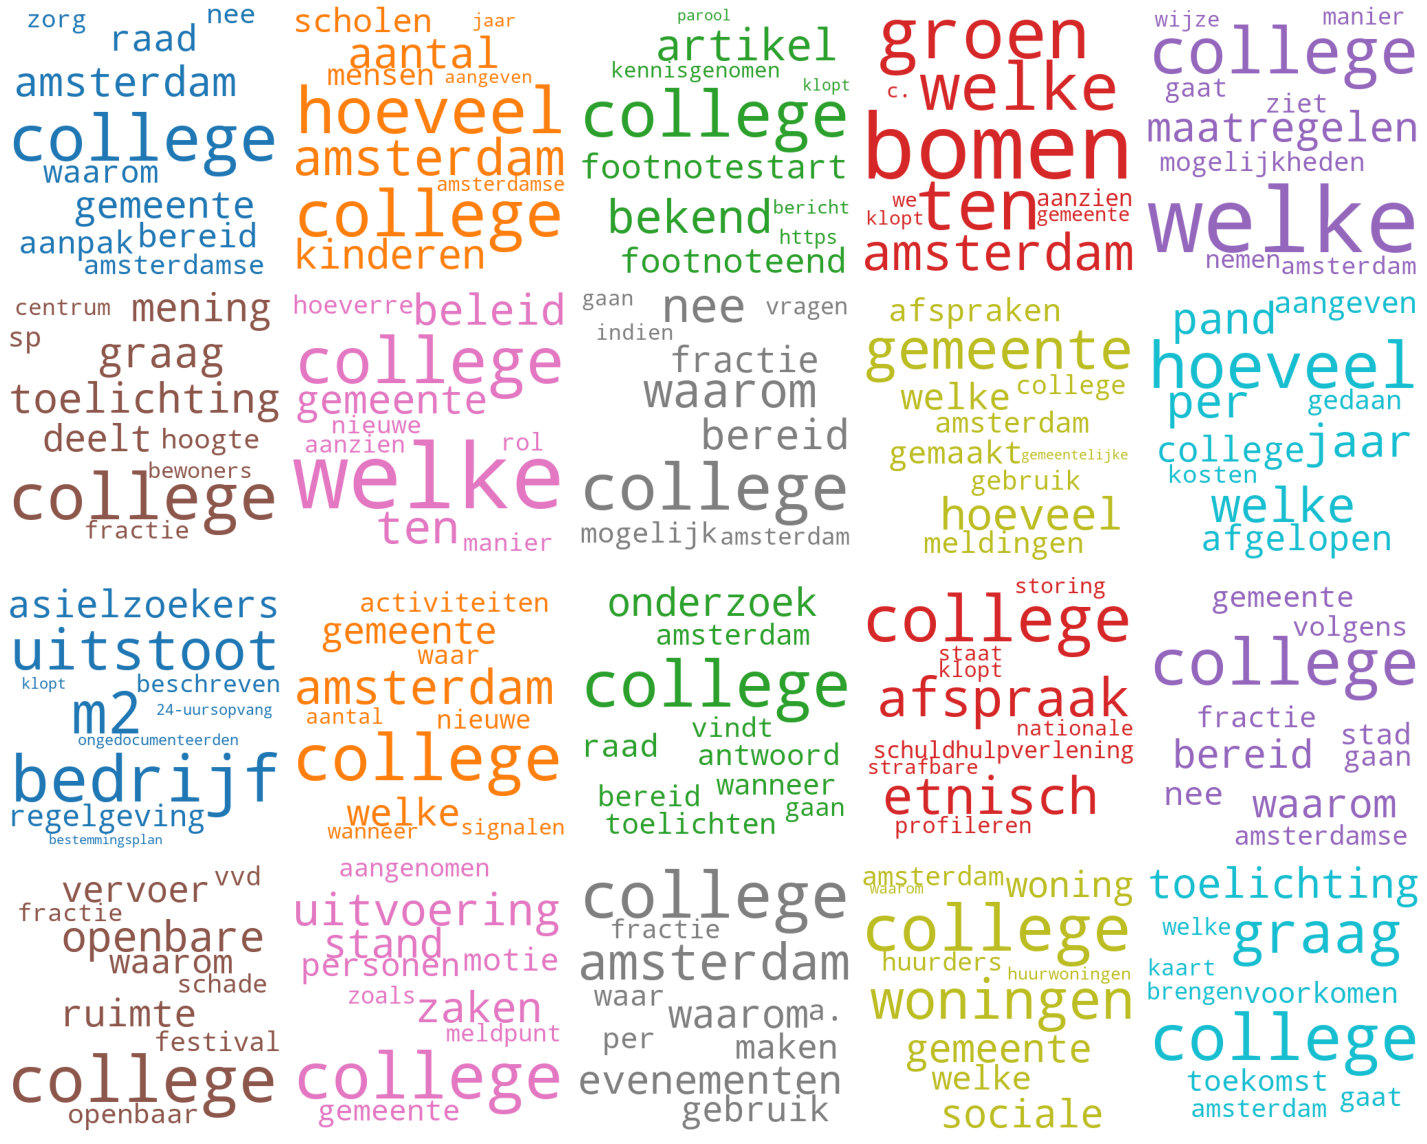

In [19]:
K=20
nb_columns = 5
nb_rows = math.ceil(K / nb_columns)

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()] 
cols = cols * math.ceil(K / len(cols))

cloud = WordCloud(background_color='white',
                  width=400,
                  height=400,
                  max_words=10,
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model_q.show_topics(num_topics=K, num_words=10, formatted=False)

fig, axes = plt.subplots(ncols=nb_columns, nrows=nb_rows, 
                         figsize=(4*nb_columns, 4*nb_rows), 
                         sharex=True, sharey=True)

for i, (topic, ax) in enumerate(zip(topics, axes.flatten())):
    topic_words = dict(topic[1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    ax.imshow(cloud)
    #ax.set_title('Topic ' + str(i), fontdict=dict(size=16))
    ax.axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [20]:
answers_prepr = []
answers_len = []
for answer in answers:
    preprocessed = process_text(str(answer), stop, remove_stopwords=True, lowercase_text=True, remove_punct=True)
    answers_prepr.append(preprocessed)
    answers_len.append(len(preprocessed))

In [59]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk_stopwords = set(stopwords.words('dutch'))
custom_stopwords = ['college', 'we', 'nee', 'ja']
combined_stopwords = nltk_stopwords.union(custom_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/natalipeeva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
def remove_stopwords(word_lists, stopwords):
    # Iterate over each word list
    for word_list in word_lists:
        # Use list comprehension to filter out stopwords
        filtered_words = [word for word in word_list if word not in stopwords]
        # Update the word list with the filtered words
        word_list[:] = filtered_words


In [66]:
remove_stopwords(answers_prepr, combined_stopwords)

In [72]:
dic=gensim.corpora.Dictionary(answers_prepr)
bow_corpus = [dic.doc2bow(doc) for doc in answers_prepr]

In [73]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 20,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2, 
                                      random_state=42)

In [74]:
lda_model.show_topics(20)

[(0,
  '0.032*"stadsdeel" + 0.012*"bewoners" + 0.010*"centrum" + 0.008*"stadsdelen" + 0.008*"noord" + 0.008*"zuidoost" + 0.007*"west" + 0.006*"zuid" + 0.006*"bestuur" + 0.005*"gesprek"'),
 (1,
  '0.011*"gemeente" + 0.008*"raad" + 0.007*"statushouders" + 0.006*"amsterdam" + 0.004*"nieuwe" + 0.004*"rvc" + 0.004*"toezicht" + 0.003*"bestuur" + 0.003*"stadsregio" + 0.003*"basis"'),
 (2,
  '0.012*"ouderen" + 0.005*"amsterdam" + 0.005*"mantelzorgers" + 0.004*"jaar" + 0.004*"kinderboerderijen" + 0.003*"eenzaamheid" + 0.003*"meter" + 0.003*"aantal" + 0.003*"tussen" + 0.003*"paarden"'),
 (3,
  '0.028*"politie" + 0.009*"meldingen" + 0.008*"amsterdam" + 0.007*"aantal" + 0.006*"sprake" + 0.006*"onderzoek" + 0.006*"melding" + 0.006*"handhaving" + 0.005*"wel" + 0.005*"incidenten"'),
 (4,
  '0.011*"amsterdam" + 0.009*"gemeente" + 0.007*"nieuwe" + 0.007*"stad" + 0.007*"bewoners" + 0.006*"afval" + 0.005*"aanpak" + 0.005*"ymere" + 0.004*"jaar" + 0.004*"zoals"'),
 (5,
  '0.026*"pand" + 0.019*"eigenaar" + 

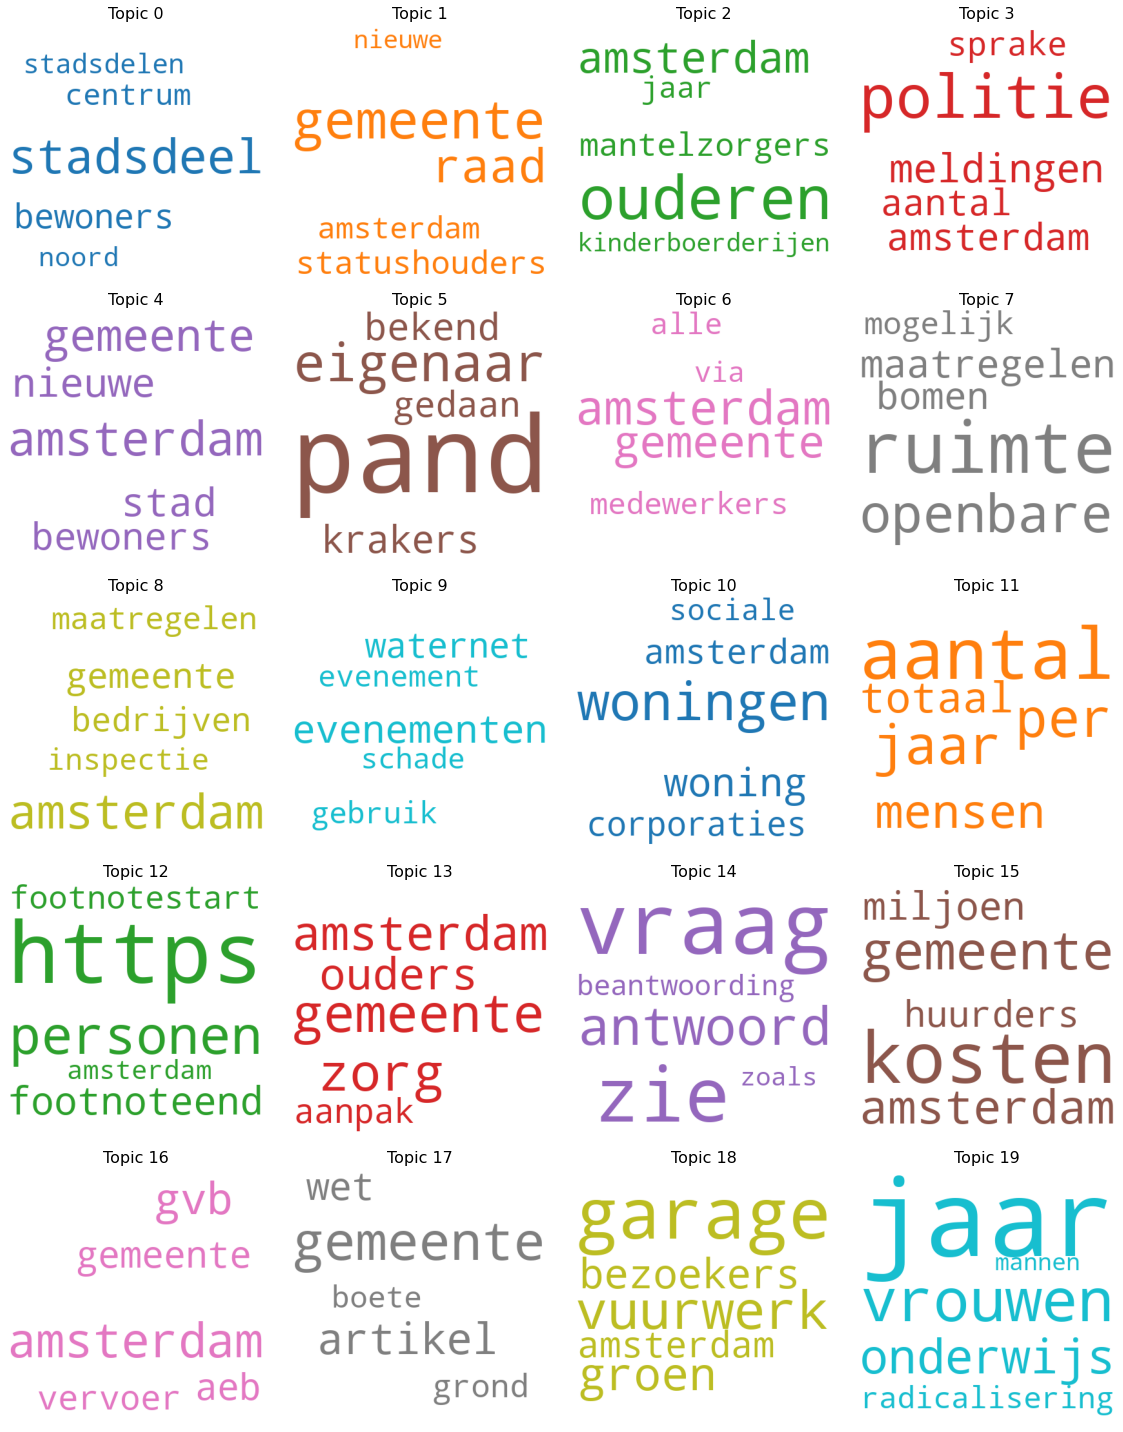

In [75]:
K=20
nb_columns = 4
nb_rows = math.ceil(K / nb_columns)

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cols = cols * math.ceil(K / len(cols))

cloud = WordCloud(background_color='white',
                  width=400,
                  height=400,
                  max_words=10,
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(num_topics=K, num_words=5, formatted=False)

fig, axes = plt.subplots(ncols=nb_columns, nrows=nb_rows, 
                         figsize=(4*nb_columns, 4*nb_rows), 
                         sharex=True, sharey=True)

for i, (topic, ax) in enumerate(zip(topics, axes.flatten())):
    topic_words = dict(topic[1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    ax.imshow(cloud)
    ax.set_title('Topic ' + str(i), fontdict=dict(size=16))
    ax.axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [25]:
question_types = {'wie': 0,
                 'wat': 0,
                 'waar': 0,
                 'waneer': 0,
                 'waarom': 0,
                 'welke': 0}

In [26]:
for q in questions_prepr:
    for w in q:
        if w in question_types:
            question_types[w]+=1

In [27]:
question_types

{'wie': 0, 'wat': 0, 'waar': 991, 'waneer': 1, 'waarom': 2931, 'welke': 4299}

Is there a reason why 'wie' and 'wat'are stopwords? Is wie like in German?

In [28]:
opinion_words = {'mening': 0,
                 'convictie': 0, 
                 'denkbeeld': 0,
                 'denkwijs': 0,
                 'denkwijze': 0,
                 'dunk':0,
                 'gedacht':0,
                 'gedachte':0,
                 'geest': 0,
                 'gevoelen':0,
                 'gezindheid': 0,
                 'idee': 0,
                 'inzicht':0,
                 'inzien':0,
                 'kijk':0, 
                 'oordeel':0,
                 'opinie':0,
                 'bevindingen':0,
                 'besluiten':0,
                 'beslissend':0,
                 'stellingname':0,
                 'visie':0,
                 'zienswijze':0,
                 'zin':0,
                'bekend':0,
                'college':0,
                'vindt':0}

In [29]:
for q in questions_prepr:
    for w in q:
        if w in opinion_words:
            opinion_words[w]+=1

In [30]:
opinion_words

{'mening': 1092,
 'convictie': 0,
 'denkbeeld': 0,
 'denkwijs': 0,
 'denkwijze': 0,
 'dunk': 0,
 'gedacht': 12,
 'gedachte': 9,
 'geest': 8,
 'gevoelen': 0,
 'gezindheid': 1,
 'idee': 49,
 'inzicht': 169,
 'inzien': 14,
 'kijk': 1,
 'oordeel': 86,
 'opinie': 3,
 'bevindingen': 50,
 'besluiten': 41,
 'beslissend': 0,
 'stellingname': 6,
 'visie': 91,
 'zienswijze': 13,
 'zin': 71,
 'bekend': 1056,
 'college': 15404,
 'vindt': 724}

In [31]:
opinion_words = {'mening': 0,
                 'convictie': 0, 
                 'denkbeeld': 0,
                 'denkwijs': 0,
                 'denkwijze': 0,
                 'dunk':0,
                 'gedacht':0,
                 'gedachte':0,
                 'geest': 0,
                 'gevoelen':0,
                 'gezindheid': 0,
                 'idee': 0,
                 'inzicht':0,
                 'inzien':0,
                 'kijk':0, 
                 'oordeel':0,
                 'opinie':0,
                 'bevindingen':0,
                 'besluiten':0,
                 'beslissend':0,
                 'stellingname':0,
                 'visie':0,
                 'zienswijze':0,
                 'zin':0,
                'bekend':0,
                'college':0,
                'vindt':0}
for q in questions_prepr:
    for w in opinion_words:
        if w in q: 
            opinion_words[w]+=1
opinion_words

{'mening': 1051,
 'convictie': 0,
 'denkbeeld': 0,
 'denkwijs': 0,
 'denkwijze': 0,
 'dunk': 0,
 'gedacht': 12,
 'gedachte': 9,
 'geest': 8,
 'gevoelen': 0,
 'gezindheid': 1,
 'idee': 46,
 'inzicht': 156,
 'inzien': 14,
 'kijk': 1,
 'oordeel': 86,
 'opinie': 2,
 'bevindingen': 48,
 'besluiten': 40,
 'beslissend': 0,
 'stellingname': 5,
 'visie': 79,
 'zienswijze': 12,
 'zin': 68,
 'bekend': 1019,
 'college': 11822,
 'vindt': 694}

In [32]:
opinion_words_links = {'mening': 0,
                 'convictie': 0, 
                 'denkbeeld': 0,
                 'denkwijs': 0,
                 'denkwijze': 0,
                 'dunk':0,
                 'gedacht':0,
                 'gedachte':0,
                 'geest': 0,
                 'gevoelen':0,
                 'gezindheid': 0,
                 'idee': 0,
                 'inzicht':0,
                 'inzien':0,
                 'kijk':0, 
                 'oordeel':0,
                 'opinie':0,
                 'bevindingen':0,
                 'besluiten':0,
                 'beslissend':0,
                 'stellingname':0,
                 'visie':0,
                 'zienswijze':0,
                 'zin':0,
                'bekend':0,
                'college':0,
                'vindt':0,
                'standpunt':0,
                'bereid':0,
                'kennisgenomen':0}

In [33]:
questions_prepr_stop_url = []
for question in df_trans_links['Question']:
    preprocessed = process_text(question, stop, remove_stopwords=False, lowercase_text=True)
    questions_prepr_stop_url.append(preprocessed)

In [34]:
for q in questions_prepr_stop_url:
    for w in q:
        if w in opinion_words:
            opinion_words_links[w]+=1

In [35]:
opinion_words_links

{'mening': 37,
 'convictie': 0,
 'denkbeeld': 0,
 'denkwijs': 0,
 'denkwijze': 0,
 'dunk': 0,
 'gedacht': 0,
 'gedachte': 0,
 'geest': 0,
 'gevoelen': 0,
 'gezindheid': 0,
 'idee': 1,
 'inzicht': 6,
 'inzien': 1,
 'kijk': 0,
 'oordeel': 3,
 'opinie': 0,
 'bevindingen': 3,
 'besluiten': 4,
 'beslissend': 0,
 'stellingname': 0,
 'visie': 5,
 'zienswijze': 0,
 'zin': 2,
 'bekend': 53,
 'college': 546,
 'vindt': 40,
 'standpunt': 0,
 'bereid': 0,
 'kennisgenomen': 0}

### check n-grams

In [36]:
questions_prepr_stop = []
for question in questions:
    preprocessed = process_text(str(question), stop, remove_stopwords=False, lowercase_text=True, remove_punct=True)
    questions_prepr_stop.append(preprocessed)

In [37]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

In [38]:
corpus_q = sum(questions_prepr_stop, [])

<AxesSubplot:>

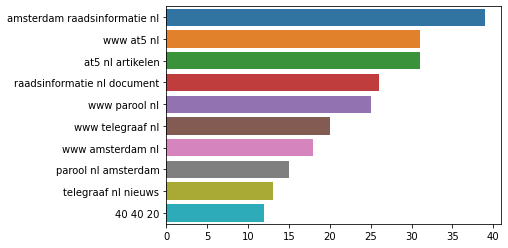

In [39]:
top_n_trigrams=get_top_ngram(corpus_q,3)
x,y=map(list,zip(*top_n_trigrams[:10])) 
sns.barplot(x=y,y=x)

In [40]:
top_n_trigrams=get_top_ngram(corpus_q,3)
top_n_trigrams

[('amsterdam raadsinformatie nl', 39),
 ('www at5 nl', 31),
 ('at5 nl artikelen', 31),
 ('raadsinformatie nl document', 26),
 ('www parool nl', 25),
 ('www telegraaf nl', 20),
 ('www amsterdam nl', 18),
 ('parool nl amsterdam', 15),
 ('telegraaf nl nieuws', 13),
 ('40 40 20', 12),
 ('bin showdoc cgi', 12),
 ('showdoc cgi action', 12),
 ('cgi action view', 11),
 ('action view id', 11),
 ('bekendmakingen amsterdam nl', 11),
 ('amsterdam nl bekendmakingen', 11),
 ('nl bekendmakingen stadsdeel', 11),
 ('zoeken amsterdam raadsinformatie', 10),
 ('raadsinformatie nl cgi', 10),
 ('www rijksoverheid nl', 9),
 ('nos nl artikel', 8),
 ('amsterdam nl publish', 8),
 ('nl publish pages', 8),
 ('west 2019 week', 8),
 ('www volkskrant nl', 7),
 ('www ad nl', 6),
 ('bekendmakingen stadsdeel nieuw', 6),
 ('www binnenlandsbestuur nl', 5),
 ('volkskrant nl nieuws', 5),
 ('nl nieuws achtergrond', 5),
 ('glas in lood', 5),
 ('mic miz meldingen', 4),
 ('nl wp content', 4),
 ('wp content uploads', 4),
 ('sit

<AxesSubplot:>

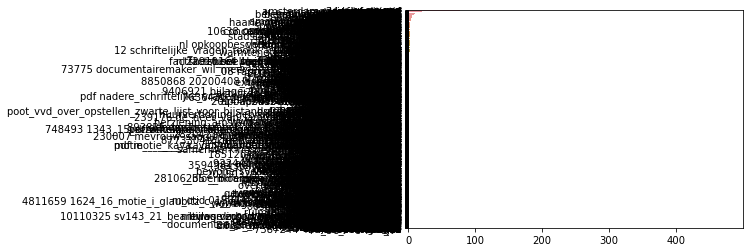

In [41]:
top_n_bigrams=get_top_ngram(corpus_q,2)
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

In [42]:
top_n_bigrams=get_top_ngram(corpus_q,2)
top_n_bigrams

[('en of', 476),
 ('amsterdam nl', 196),
 ('nieuw west', 77),
 ('raadsinformatie nl', 41),
 ('amsterdam raadsinformatie', 39),
 ('nl nieuws', 37),
 ('24 uursopvang', 36),
 ('woz waarde', 35),
 ('at5 nl', 34),
 ('nl artikelen', 34),
 ('wel niet', 34),
 ('www at5', 31),
 ('cda fractie', 28),
 ('parool nl', 27),
 ('nl document', 27),
 ('sp fractie', 26),
 ('www parool', 25),
 ('amsterdam amstelland', 24),
 ('noord zuidlijn', 24),
 ('wob verzoeken', 23),
 ('10 000', 22),
 ('amsterdam noord', 22),
 ('telegraaf nl', 22),
 ('www telegraaf', 20),
 ('zonne energie', 19),
 ('ndsm werf', 19),
 ('covid 19', 18),
 ('www amsterdam', 18),
 ('lvv pilot', 18),
 ('pro palestina', 17),
 ('niet westerse', 17),
 ('noord holland', 16),
 ('nl amsterdam', 16),
 ('50 000', 15),
 ('30 000', 15),
 ('co2 uitstoot', 14),
 ('booking com', 14),
 ('adm terrein', 13),
 ('02 00', 13),
 ('meos app', 13),
 ('nos nl', 12),
 ('co2 reductie', 12),
 ('40 40', 12),
 ('40 20', 12),
 ('nl cgi', 12),
 ('bin showdoc', 12),
 ('sho

In [43]:
question_types_stop = {'wie': 0,
                 'wat': 0,
                 'waar': 0,
                 'waneer': 0,
                 'waarom': 0,
                 'welke': 0}

In [44]:
for q in questions_prepr_stop:
    for w in q:
        if w in question_types_stop:
            question_types[w]+=1

In [45]:
question_types

{'wie': 305,
 'wat': 3660,
 'waar': 1982,
 'waneer': 2,
 'waarom': 5862,
 'welke': 8598}

In [46]:
q_start = []
for q in questions_prepr_stop:
    q_start.append(q[0])

In [47]:
counted = Counter(q_start)

<AxesSubplot:>

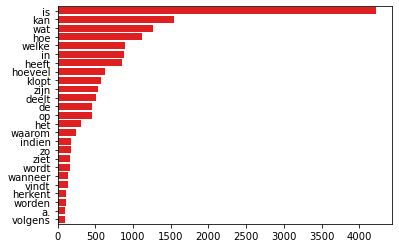

In [48]:
x,y=map(list,zip(*counted.most_common(25))) 
sns.barplot(x=y,y=x, color='red')